In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.setstyle('whitegrid')

In [4]:
%matplotlib inline

In [5]:
from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

D:\Anaconda\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
non_tech_list = ['TSLA', 'UGA']

In [7]:
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)


In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    
for stock1 in non_tech_list:
    globals()[stock1] = DataReader(stock1, 'yahoo', start, end)

In [9]:
AAPL.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-07-21,132.850006,132.919998,130.320007,130.750000,76756400,128.126477
2015-07-22,121.989998,125.500000,121.989998,125.220001,115450600,122.707438
2015-07-23,126.199997,127.089996,125.059998,125.160004,50999500,122.648645
2015-07-24,125.320000,125.739998,123.900002,124.500000,42162300,122.001884
2015-07-27,123.089996,123.610001,122.120003,122.769997,44455500,120.306594


In [10]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,106.300632,107.372885,105.173676,106.291937,4.667436e+07,105.274445
std,9.271120,9.294603,9.138045,9.191123,2.139875e+07,8.607622
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,90.339996
25%,97.320000,98.230003,96.580002,97.339996,3.248250e+07,96.980003
50%,107.089996,108.000000,105.650002,106.820000,4.179520e+07,106.005876
75%,113.760002,115.370003,112.440002,113.769997,5.402140e+07,112.139475
max,132.850006,132.919998,130.320007,130.750000,1.622063e+08,128.126477


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-07-21 to 2016-07-20
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


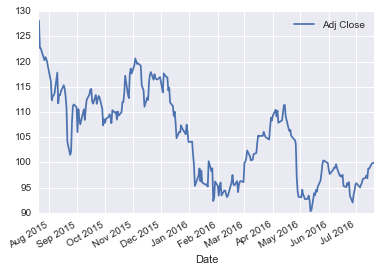

In [12]:
AAPL['Adj Close'].plot(legend = True)

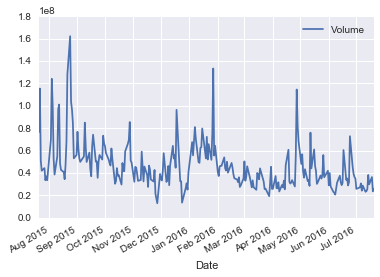

In [13]:
AAPL['Volume'].plot(legend = True)

In [14]:
ma_day = [10,20,50]

In [15]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  app.launch_new_instance()


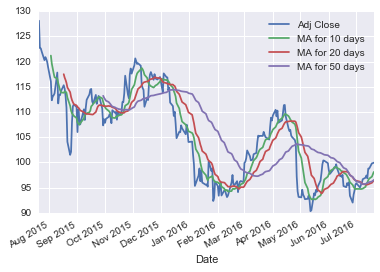

In [16]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False)

In [17]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

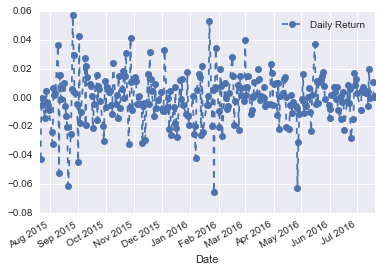

In [18]:
AAPL['Daily Return'].plot(legend = True, linestyle='--', marker='o')

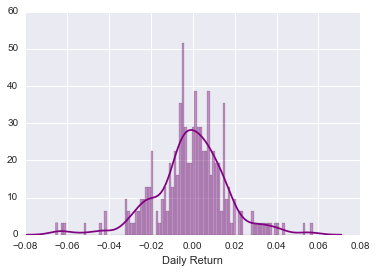

In [19]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color='purple')

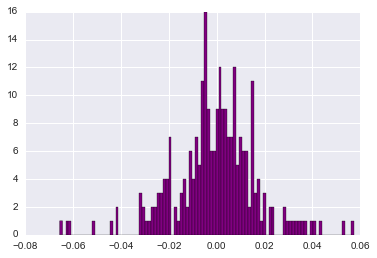

In [20]:
AAPL['Daily Return'].hist(bins =100, color='purple')

In [21]:
closing_df = DataReader(tech_list,'yahoo', start, end)['Adj Close']

In [22]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-07-21,128.126477,488.000000,662.299988,46.001440
2015-07-22,122.707438,488.269989,662.099976,44.308496
2015-07-23,122.648645,482.179993,644.280029,44.863082
2015-07-24,122.001884,529.419983,623.559998,44.697677
2015-07-27,120.306594,531.409973,627.260010,44.123632


In [23]:
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-07-21,NaN,NaN,NaN,NaN
2015-07-22,-0.042294,0.000553,-0.000302,-0.036802
2015-07-23,-0.000479,-0.012473,-0.026914,0.012516
2015-07-24,-0.005273,0.097972,-0.032160,-0.003687
2015-07-27,-0.013896,0.003759,0.005934,-0.012843


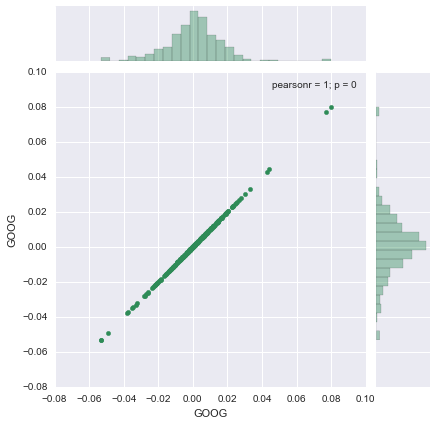

In [25]:
sns.jointplot('GOOG', 'GOOG',tech_rets,kind='scatter',color='seagreen')

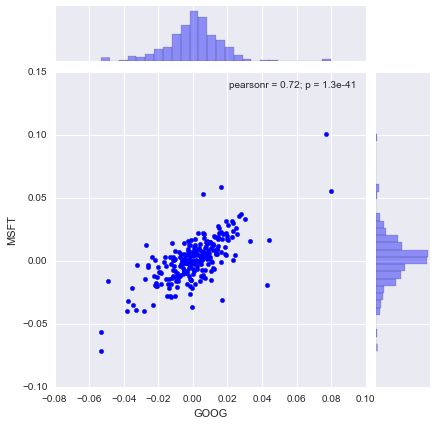

In [26]:
sns.jointplot('GOOG', 'MSFT',tech_rets,kind='scatter',color='blue')

In [27]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-07-21,NaN,NaN,NaN,NaN
2015-07-22,-0.042294,0.000553,-0.000302,-0.036802
2015-07-23,-0.000479,-0.012473,-0.026914,0.012516
2015-07-24,-0.005273,0.097972,-0.032160,-0.003687
2015-07-27,-0.013896,0.003759,0.005934,-0.012843


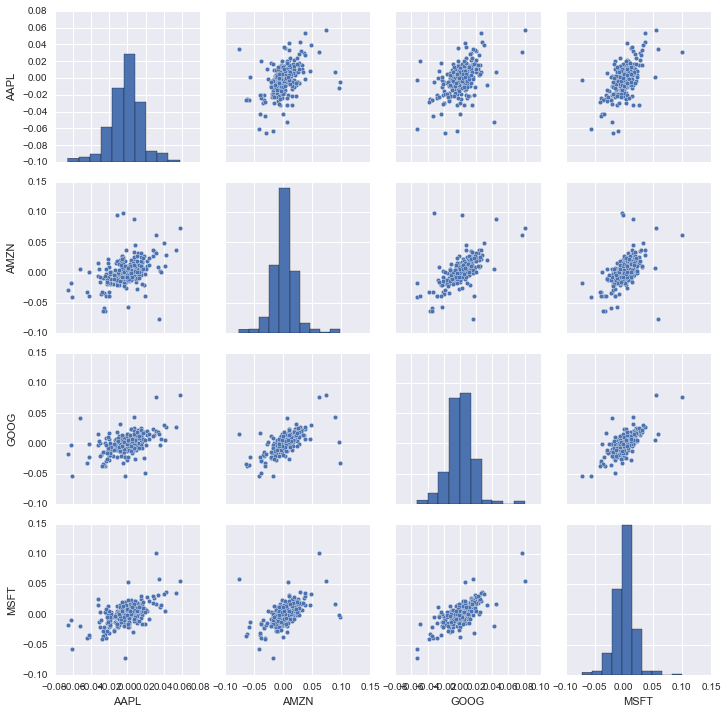

In [28]:
sns.pairplot(tech_rets.dropna())

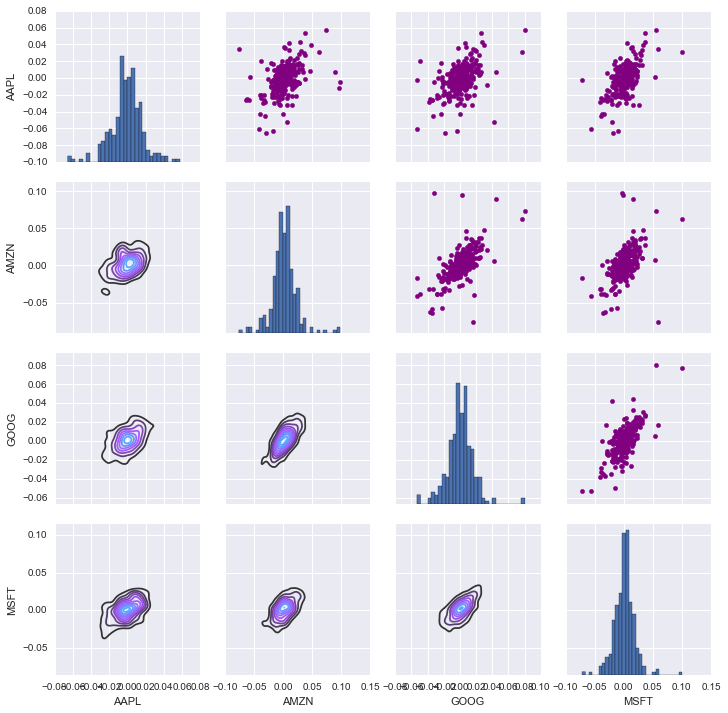

In [29]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

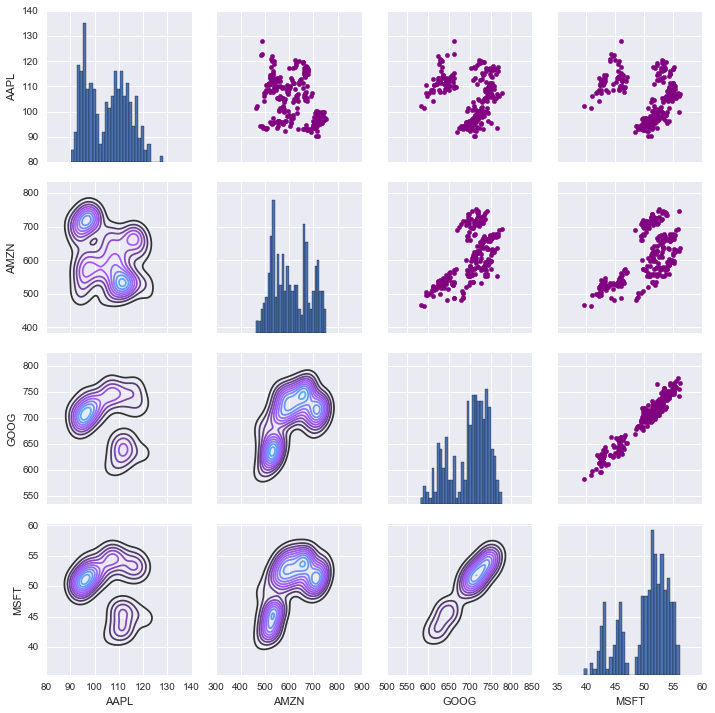

In [30]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

D:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
D:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


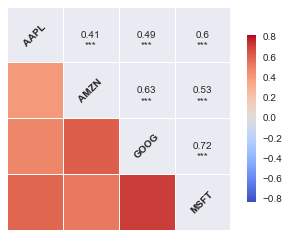

In [31]:
sns.corrplot(tech_rets.dropna(), annot=True)

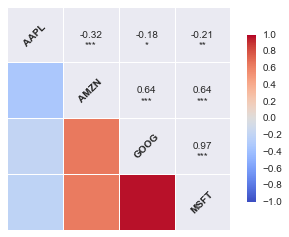

In [32]:
sns.corrplot(closing_df, annot=True)

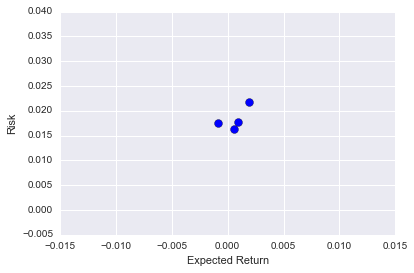

In [33]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

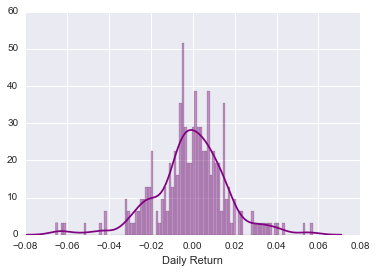

In [34]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [35]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-07-22,-0.042294,0.000553,-0.000302,-0.036802
2015-07-23,-0.000479,-0.012473,-0.026914,0.012516
2015-07-24,-0.005273,0.097972,-0.032160,-0.003687
2015-07-27,-0.013896,0.003759,0.005934,-0.012843
2015-07-28,0.004969,-0.010124,0.001180,-0.000220


In [36]:
rets['AAPL'].quantile(0.05)

-0.02859644482707982

In [37]:
days = 365
dt = 1/365
mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [38]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price
        

In [39]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-07-21,655.210022,673.000000,654.299988,662.299988,3377200,662.299988
2015-07-22,660.890015,678.640015,659.000000,662.099976,3929300,662.099976
2015-07-23,661.270020,663.630005,641.000000,644.280029,3029100,644.280029
2015-07-24,647.000000,648.169983,622.520020,623.559998,3625700,623.559998
2015-07-27,621.000000,634.299988,620.500000,627.260010,2675400,627.260010


In [40]:
start_price = 649.0

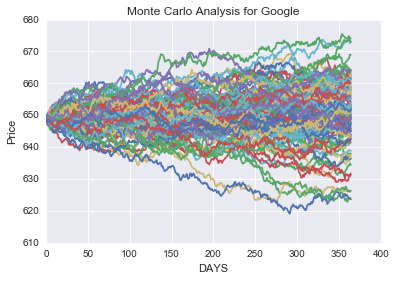

In [41]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('DAYS')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [42]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days -1]

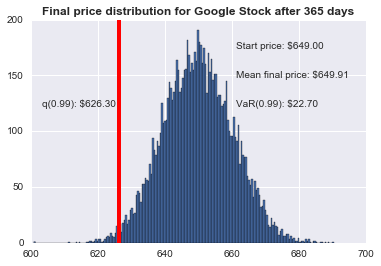

In [43]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins =200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [44]:
TSLA.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-07-21,270.049988,273.500000,266.549988,266.769989,6108700,266.769989
2015-07-22,261.269989,269.440002,260.859985,267.869995,3105000,267.869995
2015-07-23,269.649994,269.899994,265.269989,267.200012,2227200,267.200012
2015-07-24,267.380005,271.089996,263.920013,265.410004,2836500,265.410004
2015-07-27,262.429993,264.429993,250.789993,253.009995,4694200,253.009995


In [45]:
UGA.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-07-21,38.689999,39.000000,38.250000,38.619999,53400,38.619999
2015-07-22,38.000000,38.360001,37.509998,37.520000,50700,37.520000
2015-07-23,37.980000,38.060001,37.279999,37.279999,26200,37.279999
2015-07-24,37.240002,37.270000,36.610001,36.939999,41300,36.939999
2015-07-27,36.599998,36.730000,36.209999,36.259998,50700,36.259998


In [46]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-07-21 to 2016-07-20
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


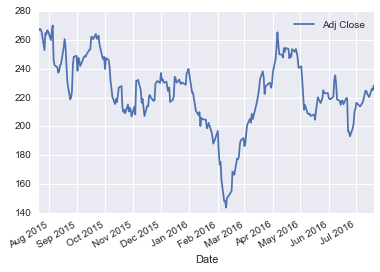

In [47]:
TSLA['Adj Close'].plot(legend=True)

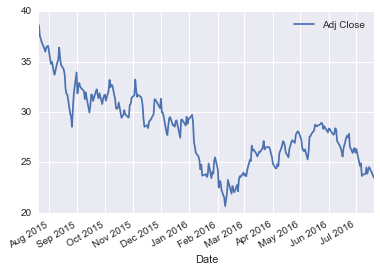

In [48]:
UGA['Adj Close'].plot(legend=True)

In [50]:
TSLA['Daily Returns'] = TSLA['Adj Close'].pct_change()
UGA['Daily Returns'] = UGA['Adj Close'].pct_change()

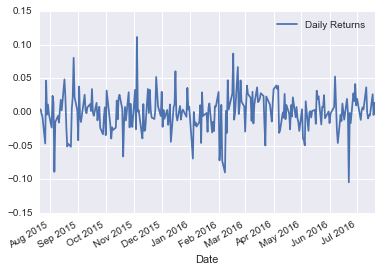

In [56]:
TSLA['Daily Returns'].plot(legend= True)

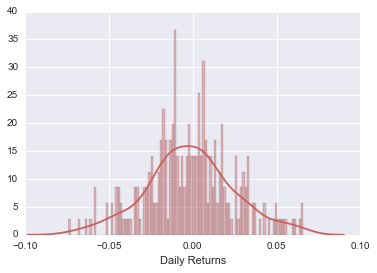

In [54]:
sns.distplot(UGA['Daily Returns'].dropna(), bins = 100, color = 'indianred')

In [56]:
closing_df_2 = DataReader(non_tech_list, 'yahoo',start, end)['Adj Close']

In [57]:
non_tech_rets = closing_df_2.pct_change()

In [59]:
non_tech_rets.head()

,TSLA,UGA
Date,,
2015-07-21,NaN,NaN
2015-07-22,0.004123,-0.028483
2015-07-23,-0.002501,-0.006397
2015-07-24,-0.006699,-0.009120
2015-07-27,-0.046720,-0.018408


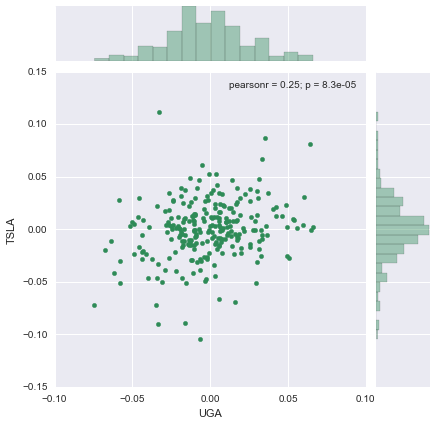

In [65]:
sns.jointplot('UGA', 'TSLA',non_tech_rets, kind='scatter',color ='seagreen')

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


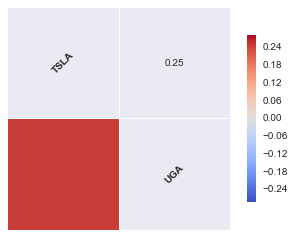

In [63]:
sns.corrplot(non_tech_rets, annot=True)

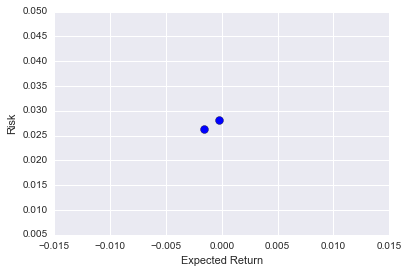

In [67]:
rets = non_tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')